#### Loading Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
# Read CSV
df= pd.read_csv("/content/Fraud.csv")

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151799 entries, 0 to 151798
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            151799 non-null  int64  
 1   type            151799 non-null  object 
 2   amount          151799 non-null  float64
 3   nameOrig        151799 non-null  object 
 4   oldbalanceOrg   151799 non-null  float64
 5   newbalanceOrig  151798 non-null  float64
 6   nameDest        151798 non-null  object 
 7   oldbalanceDest  151798 non-null  float64
 8   newbalanceDest  151798 non-null  float64
 9   isFraud         151798 non-null  float64
 10  isFlaggedFraud  151798 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 12.7+ MB


## Task 1: Data cleaning including missing values, outliers and multi-collinearity.

### Missing Values

In [ ]:
'''This function check Missing values'''
def check_NullVal(df):
    out= df.isnull().sum()
    found= 0
    for counter in out.index:
        if out[counter]>0:
            found+=1
            print('column', counter, 'having', out[counter], 'null values')
    if found==0 :
        print('There is no null values in the Dataframe')

In [ ]:
check_NullVal(df)

There is no null values in the Dataframe


In [7]:
# Impute missing values since 'oldbalanceDest' and 'newbalanceDest' have no imformation for the customers 'M'(Mercent)
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df['oldbalanceDest'] = imputer.fit_transform(df[['oldbalanceDest']])
df['newbalanceDest'] = imputer.fit_transform(df[['newbalanceDest']])

In [8]:
num_df = df.select_dtypes(include=['int64', 'float64'])
num_df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.00,160296.36,0.000000,0.000000e+00,0.0,0.0
1,1,1864.28,21249.00,19384.72,0.000000,0.000000e+00,0.0,0.0
2,1,181.00,181.00,0.00,0.000000,0.000000e+00,1.0,0.0
3,1,181.00,181.00,0.00,21182.000000,0.000000e+00,1.0,0.0
4,1,11668.14,41554.00,29885.86,0.000000,0.000000e+00,0.0,0.0
...,...,...,...,...,...,...,...,...
151794,12,21278.77,728718.50,707439.73,0.000000,0.000000e+00,0.0,0.0
151795,12,7131.13,707439.73,700308.60,0.000000,0.000000e+00,0.0,0.0
151796,12,2870.84,700308.60,697437.75,0.000000,0.000000e+00,0.0,0.0
151797,12,17873.00,697437.75,679564.76,0.000000,0.000000e+00,0.0,0.0


### Removing Outliers

In [9]:
# Removing Outliers through Z-score approach
for col in num_df.columns:
    z_scores = stats.zscore(df[col])
    abs_z_scores = np.abs(z_scores)
    outliers = (abs_z_scores > 3)  # Outliers have Z-score > 3 or < -3
    df_clean = df[~outliers]

In [10]:
# Removing Outliers through IQR approach
for col in num_df.columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = (df_clean[col] < lower_bound) | (df_clean[col] > upper_bound)
    df_cleaned = df_clean[~outliers]


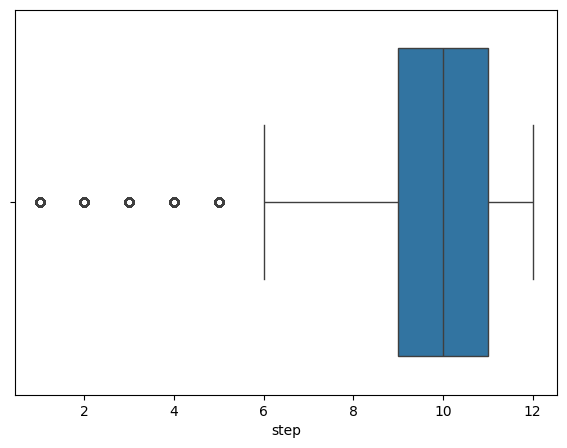

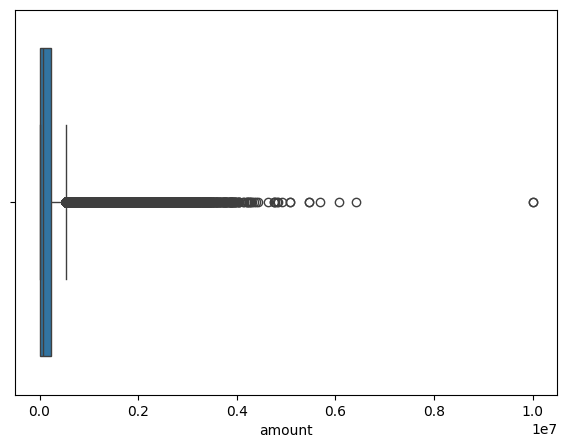

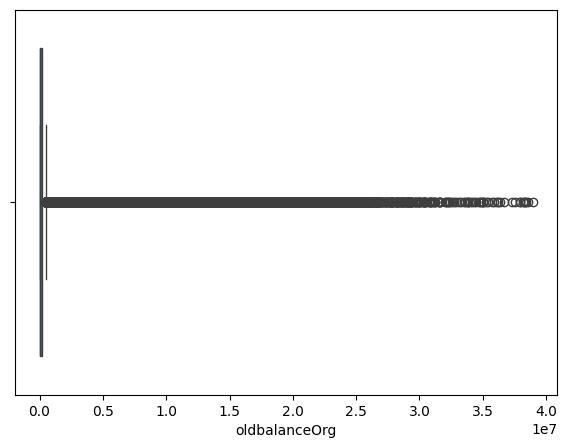

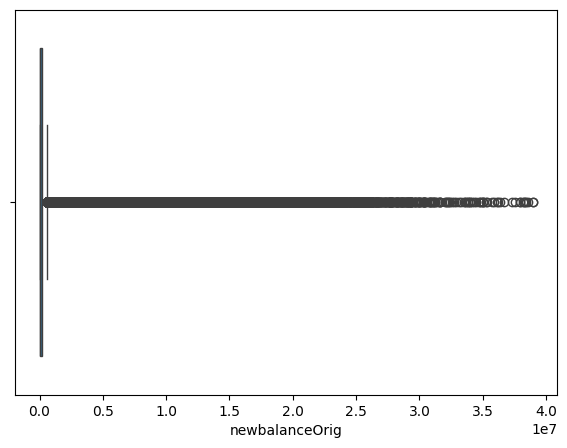

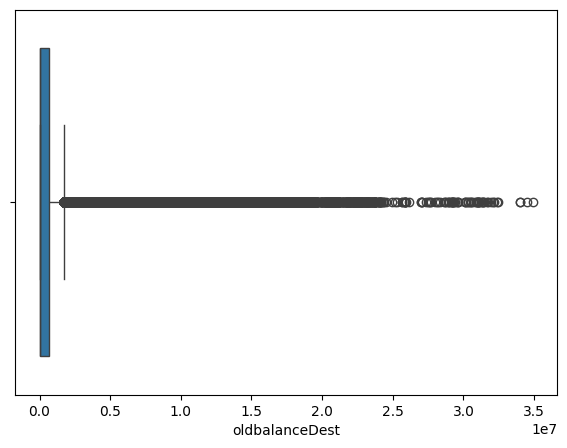

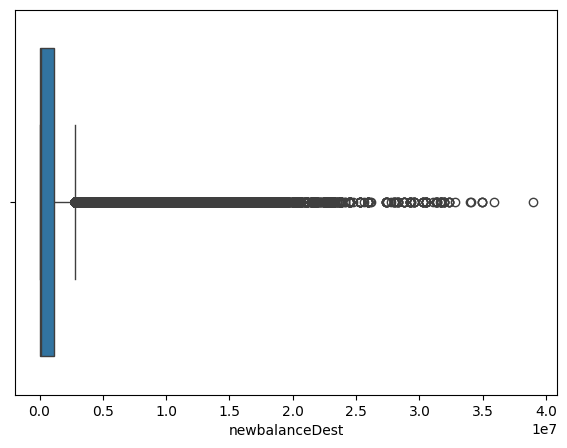

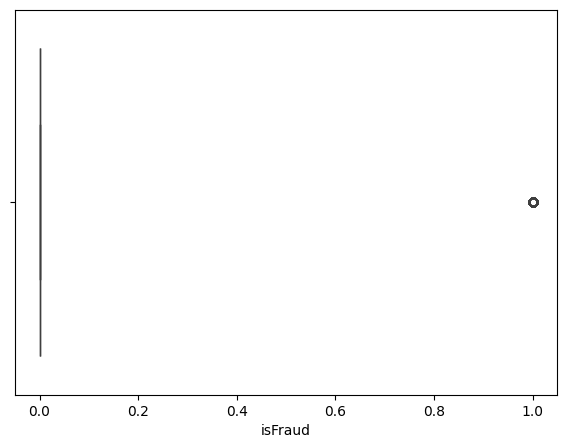

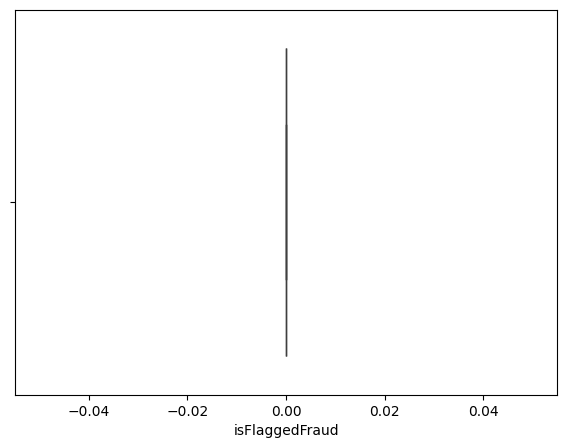

In [11]:
# Creating boxplot
for col in num_df.columns:
    plt.figure(figsize=(7, 5))
    box = sns.boxplot(x=col, data=df_cleaned)
#     sns.despine(offset=10, trim=True)
    box.set_xlabel(col)
    plt.show()

In [ ]:
df_clean.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [12]:
# Feature Transformation 'type'
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()
df_cleaned.loc[:, 'type'] = lb.fit_transform(df_cleaned['type'])

In [13]:
# Drop irrevent features
df_cleaned.drop(columns= ['nameOrig','nameDest','isFlaggedFraud'], inplace=True)

In [ ]:
df_cleaned.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0


### Multi-collinearity

,Feature,VIF
0,step,1.191098
1,amount,4.079240
2,oldbalanceOrg,544.039985
3,newbalanceOrig,546.333133
4,oldbalanceDest,72.909483
5,newbalanceDest,84.602093
6,isFraud,1.186078


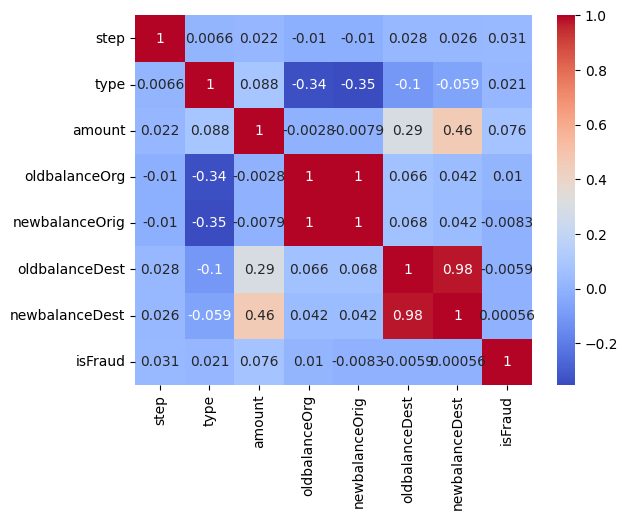

In [ ]:
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(df):
    vif = pd.DataFrame()
    vif["Feature"] = df.columns
    vif["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif

# Select numerical columns for VIF calculation
num_df1 = df_cleaned.select_dtypes(include=['int64','float64']).columns
calculate_vif(df_cleaned[num_df1])

In [ ]:
# We can remove high correlational columns, but some the columns are crucial for the model evaluation
# features_drop = vif[vif['VIF'] > 10]['Feature']
# df_cleaned.drop(features_drop, axis=1, inplace=True)

In [14]:
df_cleaned_typeAmt = df.groupby('type', as_index=False)['amount'].sum().sort_values(by='amount', ascending=False)

<ipython-input-15-adb31792d8b6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b= sns.catplot(x='type', y='amount', data=df_cleaned_typeAmt, kind= 'bar', palette= 'muted', aspect= 2, height= 5)


<Figure size 1200x500 with 0 Axes>

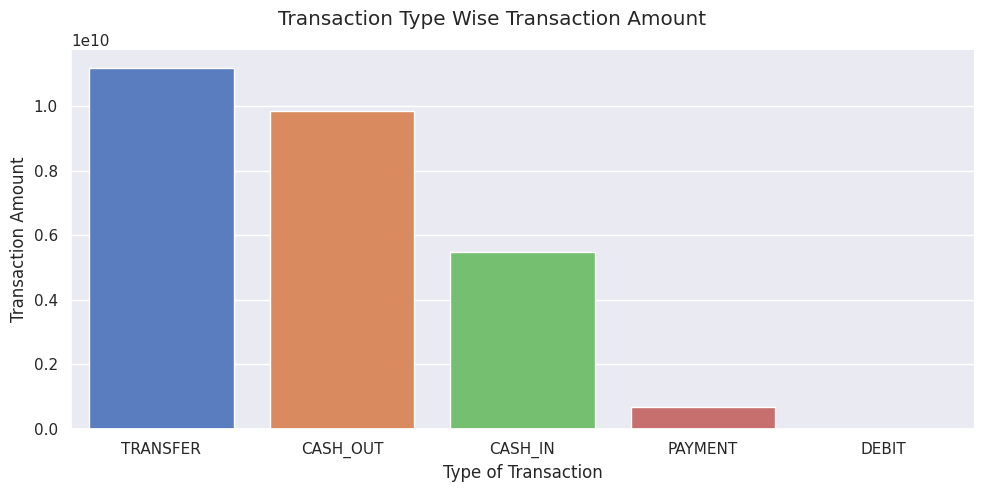

In [15]:
sns.set(style= 'darkgrid')
plt.figure(figsize=(12,5))
b= sns.catplot(x='type', y='amount', data=df_cleaned_typeAmt, kind= 'bar', palette= 'muted', aspect= 2, height= 5)

plt.subplots_adjust(top=0.9)
b.set_xlabels('Type of Transaction')
b.set_ylabels('Transaction Amount')
b.fig.suptitle('Transaction Type Wise Transaction Amount')
plt.show()

In [ ]:
df_cleaned.head()

In [ ]:
# Separate independent and target variable
X = df_cleaned.drop(columns='isFraud')
y = df_cleaned['isFraud']

# Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


## Task 2: Description of the Fraud Detection Model
I used the Random Forest Classifier for Fraud Detection because:
1.	Random Forest Classifier is an ensemble method for classification task, which predict through majority vote hence increase accuracy and decrease error rate.
2.	It can handle numerical and categorical variables more efficiently which makes the model Robust( to Overfitting).


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

# Initialising Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)


In [ ]:
# Fit the Model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluating the model's performance
from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906362
           1       0.99      0.79      0.88      2420

    accuracy                           1.00   1908782
   macro avg       0.99      0.89      0.94   1908782
weighted avg       1.00      1.00      1.00   1908782

Confusion Matrix:
 [[1906334      28]
 [    511    1909]]


## Task 3: Selecting the Variables for the model:

For selecting the features, I used domain knowledge that can impact fraudulent behaviour such as ‘amount’: Transaction amount, ‘type’: Type of Transaction, ‘oldbalance and newbalance’: Balance before and after the Transaction.

## Task 4: Demonstration of Model’s Performance and Tools:
 I used sklearn matrices such as Accuracy, Precision, Recall, F1-Score and Confusion Matrix to evaluate the model’s performance.
I used the following tools which are required:
1.	Pandas and Numpy: For Data Preprocessing and Data Manipulation
2.	Matplotlib and Seaborn: For Data Visualisation
3.	Sklearn and Scipy: For feature Transformation, model’s training and testing, model’s evaluation etc.

## Task 5: Key Factors that Predict Fraudulent Customers:
1.	Transaction Type: In the provided Dataset, the Types of Transactions are ‘CASH-IN’, ‘CASH-‘OUT’ , ’DEBIT’ , ‘PAYMENT’ and ‘TRANSFER’ among them ‘CASH-OUT’ and  ‘TRANSFER’ are more likely to Fraud.
2.	Transaction Amount: Amounts that are closest to the threshold set by organisation are more likely to Fraud.
3.	Old and New Balance: Immediate Drop or Immediate Hike in Transaction Balance is indicators of Fraudulent Activities.

## Task 6: Do these factors make sense:
Yes, These factors make sense,  
1.	Some Type of Transactions are red flags usually are those involved in high liquidating such as high amount withdrawal or transfer.
2.	Large Transaction Amount is indeed a red flag because most fraudsters are maximise their gains in a single transaction by transferring or withdrawing in lump –sum, which is abnormal in comparing to the regular transaction amounts.
3.	Unusual balance record also is a red flag because customers involved or likely to be involved in fraud have unbalanced records of Transactions.

## Task 7: kind of Prevention should be adopted while the company update its infrastructure:
1.	Regular Auditing
2.	Real-Time Monitoring

## Task 8: Assuming these actions have been implemented, how would I determine if they work?
Assuming these actions have been implemented, then I determine that it works effectively by following some approaches that are:
1.	A/B Testing: Implementing changes in a controlled manner and comparing the outcomes with a control group.
2.	Collect feedback from the monitoring system, customers, and fraud detection teams
